# Data Source

The data is sourced from CDC website where health data for 2005-2016 time period is stored based around different demographic and medical fields connected by a unique identifier for each person.

Our raw data comes from a total of 60 unique files from CDC website 



- The following link and screenshot is to represent how the files are stored on CDC website


## https://wwwn.cdc.gov/nchs/nhanes/search/DataPage.aspx?Component=Demographics

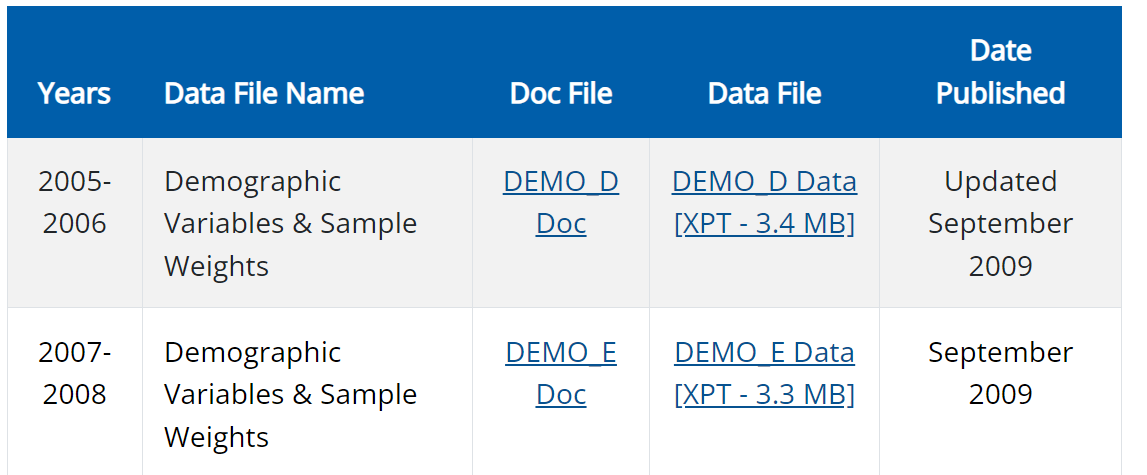

- Both the fields and actual values are generally coded, for e.g. RIAGENDR column refers to Gender with 1.0 representing male and 2.0 representing female (Sharing an example screenshot below for 2 year period)

## https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/DEMO_E.htm

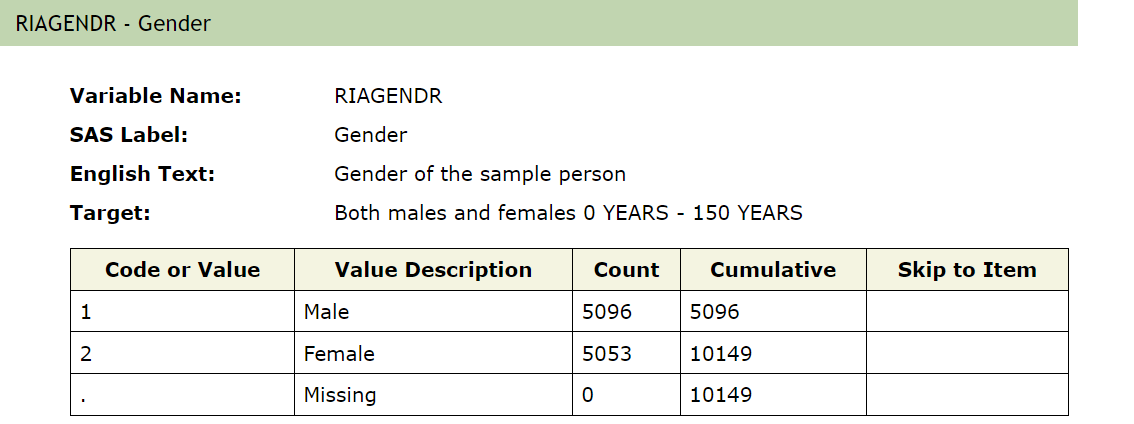


# Imports

In [81]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce

import missingno as msno



In [82]:
#Check Current Directory
# os.getcwd()

# 1 Data Collection


The steps below are to get data from CDC website, data for following key areas  has been imported in 2 year period files.

6 files for each key area, leading to a total of 12 year period (2005-2016) and a total of 60 files 


Note during Data Collection, no cleaning has been done and data in raw format has been shown below for 5 particpants.



1. Demogrpahic data
2. Body Measures
3. Blood Pressure
4. Good Cholestrol
5. Body Fat 
6. Total Cholestrol
7. Diabetes 
8. Kidney issues
9. Heart Issues
10. Smoking


In [83]:
#Import raw demographic data from following CDC link for cleaning
#https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics

filenames = ['../Raw Data/DEMO/DEMO_D.XPT',
             '../Raw Data/DEMO/DEMO_E.XPT',
             '../Raw Data/DEMO/DEMO_F.XPT',
             '../Raw Data/DEMO/DEMO_G.XPT',
             '../Raw Data/DEMO/DEMO_H.XPT',
             '../Raw Data/DEMO/DEMO_I.XPT']
           
  
demo_df = [] 
for filename in filenames: 
    demo_df.append(pd.read_sas(filename))
    
#rename the income column for 2005-2006 to be consistent with rest of the years
demo_df[0] = demo_df[0].rename(columns={'INDFMINC': 'INDFMIN2'})
demo_df = pd.concat(demo_df, ignore_index=True)


#select needed columns
demo_list = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'INDFMIN2','DMDHHSIZ','DMDMARTL']
demo = demo_df.loc[:, demo_list]

In [84]:
#Import raw blood pressure data from following CDC link for cleaning
#https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination

filenames = ['../Raw Data/BP/BPX_D.XPT',
             '../Raw Data/BP/BPX_E.XPT',
             '../Raw Data/BP/BPX_F.XPT',
             '../Raw Data/BP/BPX_G.XPT',
             '../Raw Data/BP/BPX_H.XPT',
             '../Raw Data/BP/BPX_I.XPT']
           
  
bpx_df = [] 
for filename in filenames: 
    bpx_df.append(pd.read_sas(filename))

#select needed columns
bpx_df = pd.concat(bpx_df, ignore_index=True)
bpx_list = ['SEQN', 'BPXPULS','BPXSY1', 'BPXDI1']
bpx = bpx_df.loc[:, bpx_list]


In [85]:
#Import raw BMI data from following CDC link for cleaning
#https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination

filenames = ['../Raw Data/BMI/BMX_D.XPT',
             '../Raw Data/BMI/BMX_E.XPT',
             '../Raw Data/BMI/BMX_F.XPT',
             '../Raw Data/BMI/BMX_G.XPT',
             '../Raw Data/BMI/BMX_H.XPT',
             '../Raw Data/BMI/BMX_I.XPT']
           
  
bmi_df = [] 
for filename in filenames: 
    bmi_df.append(pd.read_sas(filename))
    

#select needed columns
bmi_df = pd.concat(bmi_df, ignore_index=True)
bmi_list = ['SEQN', 'BMXBMI', 'BMXWAIST']
bmi = bmi_df.loc[:, bmi_list]


In [86]:
#Import raw HDL (Good Cholesterol) data from following CDC link for cleaning
# http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory

filenames = ['../Raw Data/HDL/HDL_D.XPT',
             '../Raw Data/HDL/HDL_E.XPT',
             '../Raw Data/HDL/HDL_F.XPT',
             '../Raw Data/HDL/HDL_G.XPT',
             '../Raw Data/HDL/HDL_H.XPT',
             '../Raw Data/HDL/HDL_I.XPT']
           
  
hdl_df = [] 
for filename in filenames: 
    hdl_df.append(pd.read_sas(filename))

#select needed columns
hdl_df = pd.concat(hdl_df, ignore_index=True)
hdl_list = ['SEQN', 'LBDHDD']
hdl = hdl_df.loc[:, hdl_list]


In [87]:
#Import raw Triglyceride (Body Fat) data from following CDC link for cleaning
# http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory

filenames = ['../Raw Data/TRIGLY/TRIGLY_D.XPT',
             '../Raw Data/TRIGLY/TRIGLY_E.XPT',
             '../Raw Data/TRIGLY/TRIGLY_F.XPT',
             '../Raw Data/TRIGLY/TRIGLY_G.XPT',
             '../Raw Data/TRIGLY/TRIGLY_H.XPT',
             '../Raw Data/TRIGLY/TRIGLY_I.XPT']
           
  
trigly_df = [] 
for filename in filenames: 
    trigly_df.append(pd.read_sas(filename))

    
#select needed columns
trigly_df = pd.concat(trigly_df, ignore_index=True)
trigly_list = ['SEQN', 'LBXTR', 'LBDLDL']
trigly = trigly_df.loc[:, trigly_list]

In [88]:
#Import raw Total Cholestrol (Good + Bad Cholestrol) data from following CDC link for cleaning
# http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory

filenames = ['../Raw Data/TCHOL/TCHOL_D.XPT',
             '../Raw Data/TCHOL/TCHOL_E.XPT',
             '../Raw Data/TCHOL/TCHOL_F.XPT',
             '../Raw Data/TCHOL/TCHOL_G.XPT',
             '../Raw Data/TCHOL/TCHOL_H.XPT',
             '../Raw Data/TCHOL/TCHOL_I.XPT']
           
  
tchol_df = [] 
for filename in filenames: 
    tchol_df.append(pd.read_sas(filename))
    
#select needed columns
tchol_df = pd.concat(tchol_df, ignore_index=True)
tchol_list = ['SEQN', 'LBXTC']
tchol = tchol_df.loc[:, tchol_list]

In [89]:
#Import raw Diabetes data from following CDC link for cleaning
#http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire

filenames = ['../Raw Data/DIQ/DIQ_D.XPT',
             '../Raw Data/DIQ/DIQ_E.XPT',
             '../Raw Data/DIQ/DIQ_F.XPT',
             '../Raw Data/DIQ/DIQ_G.XPT',
             '../Raw Data/DIQ/DIQ_H.XPT',
             '../Raw Data/DIQ/DIQ_I.XPT']
           
  
diq_df = [] 
for filename in filenames: 
    diq_df.append(pd.read_sas(filename))
    
#select needed columns
diq_df = pd.concat(diq_df, ignore_index=True)
diq_list = ['SEQN', 'DIQ010','DID040']
diq = diq_df.loc[:, diq_list]

In [90]:
#Import raw Kidney data from following CDC link for cleaning
#http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire

filenames = ['../Raw Data/KIQ_U/KIQ_U_D.XPT',
             '../Raw Data/KIQ_U/KIQ_U_E.XPT',
             '../Raw Data/KIQ_U/KIQ_U_F.XPT',
             '../Raw Data/KIQ_U/KIQ_U_G.XPT',
             '../Raw Data/KIQ_U/KIQ_U_H.XPT',
             '../Raw Data/KIQ_U/KIQ_U_I.XPT']
           
  
kiq_u_df = [] 
for filename in filenames: 
    kiq_u_df.append(pd.read_sas(filename))

    
#select needed columns
kiq_u_df = pd.concat(kiq_u_df, ignore_index=True)
kiq_u_list = ['SEQN', 'KIQ022']
kiq_u = kiq_u_df.loc[:, kiq_u_list]


In [91]:
#Import raw Heart Stroke/ Attack data from following CDC link for cleaning
#http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire

filenames = ['../Raw Data/MCQ/MCQ_D.XPT',
             '../Raw Data/MCQ/MCQ_E.XPT',
             '../Raw Data/MCQ/MCQ_F.XPT',
             '../Raw Data/MCQ/MCQ_G.XPT',
             '../Raw Data/MCQ/MCQ_H.XPT',
             '../Raw Data/MCQ/MCQ_I.XPT']
           
  
mcq_df = [] 
for filename in filenames: 
    mcq_df.append(pd.read_sas(filename))

#select needed columns
mcq_df = pd.concat(mcq_df, ignore_index=True)
mcq_list = ['SEQN', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ300A']
mcq = mcq_df.loc[:, mcq_list]

In [92]:
#Import raw Smoking data from following CDC link for cleaning
#http://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire

filenames = ['../Raw Data/SMQ/SMQ_D.XPT',
             '../Raw Data/SMQ/SMQ_E.XPT',
             '../Raw Data/SMQ/SMQ_F.XPT',
             '../Raw Data/SMQ/SMQ_G.XPT',
             '../Raw Data/SMQ/SMQ_H.XPT',
             '../Raw Data/SMQ/SMQ_I.XPT']
           
  
smq_df = [] 
for filename in filenames: 
    smq_df.append(pd.read_sas(filename))

#select needed columns
smq_df = pd.concat(smq_df, ignore_index=True)
smq_list = ['SEQN', 'SMQ020','SMQ040','SMQ050Q','SMQ050U']
smq = smq_df.loc[:, smq_list]

#merging all the data from above on SEQN
pdList = [demo, bpx, bmi, hdl, trigly, tchol, diq,
          kiq_u, mcq, smq]
cvd_raw = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'), pdList)

In [93]:
#checking the number of rows and columns for completely raw CDC data
cvd_raw.shape

(60936, 29)

In [94]:
# Raw Data Snapshot
cvd_raw.head().T

,0,1,2,3,4
SEQN,3.112700e+04,31128.00,31129.00,31130.0,31131.0
RIAGENDR,1.000000e+00,2.00,1.00,2.0,2.0
RIDAGEYR,5.397605e-79,11.00,15.00,85.0,44.0
RIDRETH1,3.000000e+00,4.00,4.00,3.0,4.0
INDFMIN2,4.000000e+00,5.00,10.00,4.0,11.0
DMDHHSIZ,4.000000e+00,7.00,6.00,1.0,4.0
DMDMARTL,NaN,NaN,5.00,2.0,1.0
BPXPULS,1.000000e+00,1.00,1.00,1.0,1.0
BPXSY1,NaN,100.00,104.00,NaN,144.0
BPXDI1,NaN,62.00,76.00,NaN,74.0


# 2.0 Data Cleaning

In [95]:
#Updated column names
cvd_raw.rename(columns={'SEQN': 'id', 'RIAGENDR': 'gender', 'RIDAGEYR':'age',
                   'RIDRETH1':'ethnicity', 'INDFMIN2':'income', 'DMDHHSIZ' : 'household_size', 'DMDMARTL':'marital_status', 
                   'BPXPULS':'bp_regularity', 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 'BMXBMI':'bmi',
                   'BMXWAIST':'waist_size', 'LBDHDD':'good_cholesterol', 'LBXTR':'body_fat',
                   'LBDLDL':'bad_cholesterol', 'LBXTC':'total_cholesterol', 'DIQ010':'diabetes_diagnosis', 'DID040':'diabetes_diagnosis_age',
                   'KIQ022':'kidney_fail', 'MCQ160B':'congestive_fail', 'MCQ160C':'coronary_disease',
                   'MCQ160D':'angina', 'MCQ160E':'heart_attack',
                   'MCQ160F':'heart_stroke', 'MCQ300A':'fam_heart_issues', 'SMQ020':'cig_smoker','SMQ040':'cig_quit'
                   ,'SMQ050Q':'cig_quit_days','SMQ050U':'cig_quit_days_unit'     
                   }, inplace=True)
cvd_raw.set_index('id', inplace=True)

In [96]:
# Visual and positional represpentation of missing values
#msno.matrix(cvd_raw)

#no visible pattern

In [97]:
#Checked for percent and total missing values
missing = pd.concat([cvd_raw.isnull().sum(), 100 * cvd_raw.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
diabetes_diagnosis_age,56601,92.885979
cig_quit_days_unit,52884,86.786136
cig_quit_days,52740,86.549823
cig_quit,45550,74.750558
bad_cholesterol,42821,70.272089
body_fat,42532,69.797821
kidney_fail,26757,43.910004
congestive_fail,26757,43.910004
coronary_disease,26757,43.910004
angina,26757,43.910004


In [98]:
#filtered the data for individuals over 20 years in age to reduce number of enteries with missing heart disease value
cvd_raw = cvd_raw[cvd_raw.age >=20]

In [99]:
#Checked for percent and total missing values after adding minimum age cutoff of 20
missing = pd.concat([cvd_raw.isnull().sum(), 100 * cvd_raw.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
diabetes_diagnosis_age,29922,87.542422
cig_quit_days_unit,26148,76.500878
cig_quit_days,26005,76.082504
bad_cholesterol,19691,57.609713
body_fat,19411,56.790521
cig_quit,18878,55.231129
systolic_bp,4052,11.854886
diastolic_bp,4052,11.854886
good_cholesterol,3259,9.534816
total_cholesterol,3259,9.534816


In [100]:
#Filtered to look at only entry left with a missing heart attack value
cvd_raw[cvd_raw.heart_attack.isna()==True]

,gender,age,ethnicity,income,household_size,marital_status,bp_regularity,systolic_bp,diastolic_bp,bmi,...,congestive_fail,coronary_disease,angina,heart_attack,heart_stroke,fam_heart_issues,cig_smoker,cig_quit,cig_quit_days,cig_quit_days_unit
id,,,,,,,,,,,,,,,,,,,,,
65873.0,2.0,36.0,5.0,14.0,4.0,1.0,1.0,108.0,70.0,19.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Dropped entry as all the target columns are missing value
missing_target = cvd_raw[['congestive_fail', 'coronary_disease','angina','heart_attack','heart_stroke']].isnull().sum(axis=1)
missing_target.value_counts()/len(missing_target) * 100

cvd_raw = cvd_raw[missing_target != 5]

In [102]:
#checked initial dataframe snapshot
cvd_raw.head()

,gender,age,ethnicity,income,household_size,marital_status,bp_regularity,systolic_bp,diastolic_bp,bmi,...,congestive_fail,coronary_disease,angina,heart_attack,heart_stroke,fam_heart_issues,cig_smoker,cig_quit,cig_quit_days,cig_quit_days_unit
id,,,,,,,,,,,,,,,,,,,,,
31130.0,2.0,85.0,3.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
31131.0,2.0,44.0,4.0,11.0,4.0,1.0,1.0,144.0,74.0,30.90,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN
31132.0,1.0,70.0,3.0,11.0,2.0,1.0,1.0,138.0,60.0,24.74,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
31134.0,1.0,73.0,3.0,12.0,2.0,1.0,1.0,130.0,68.0,30.63,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
31136.0,2.0,41.0,4.0,7.0,1.0,5.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN


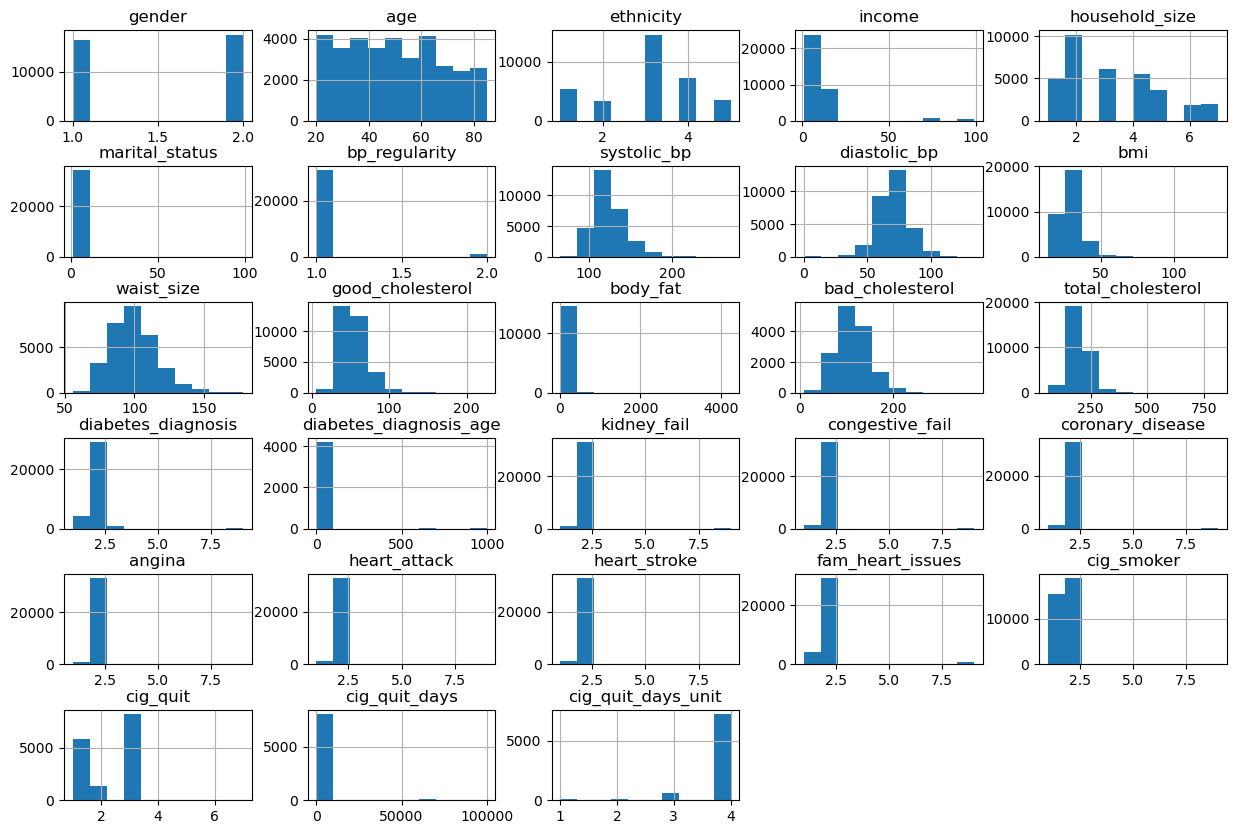

In [103]:
#checked spread of initial feature values
cvd_raw.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## All values are numerical but coded to actual values, certain values such as marital status or income show peaks at 0 because of numerical codes 0,1,2, etc. with specific meaning

## Demographical Data code to value connection are done below


In [104]:
#https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DEMO_D.htm
#demo_list = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'INDFMIN2','DMDHHSIZ','DMDMARTL']
#Demographic data coded values noting missing entries

cvd_raw['income'] = cvd_raw['income'].replace([77.0,99.0],np.NaN)
cvd_raw['marital_status'] = cvd_raw['marital_status'].replace([77.0,99.0],np.NaN)


In [105]:
# #Demographic data coded values noting different actual value

# cvd_raw['gender'] = cvd_raw['gender'].replace([1.0,2.0],['M','F'])
# cvd_raw['ethnicity'] = cvd_raw['ethnicity'].replace([1.0,2.0,3.0,4.0,5.0],['Mexcian American','Other Hispanic'
#                                                                              ,'Non-Hispanic White','Non-Hispanic Black','Other or Multi'])

# cvd_raw['income'] = cvd_raw['income'].replace([1.0,2.0,3.0,4.0,13.0],'< 20,000')
# cvd_raw['income'] = cvd_raw['income'].replace([5.0,6.0,12.0],'20,000 to < 35,000')
# cvd_raw['income'] = cvd_raw['income'].replace([7.0,8.0,9.0],'35,000 to < 65,000')
# cvd_raw['income'] = cvd_raw['income'].replace([10.0,11.0,14.0],'65,000 to 100,000')
# cvd_raw['income'] = cvd_raw['income'].replace([15.0],'100,000 <')

# cvd_raw['marital_status'] = cvd_raw['marital_status'].replace([1.0,2.0,3.0,4.0,5.0,6.0],['Married','Widowed'
#                                                                              ,'Divorced','Separated','Never Married','Living with Partner'])


In [106]:
#Age is capped at 85 so values for people over 85 is shown as 85
#household size is capped at 7

## Experimental Data code to value connection are done below

In [107]:
#https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/BPX_D.htm
# #Experimental data coded values noting different actual value

# cvd_raw['bp_regularity'] = cvd_raw['bp_regularity'].replace([1.0,2.0],['regular','irregular'])
#Bmi values are actual results in kg/m**2
#systolic and diastolic blood pressures values are actual readings in mm Hg unit
#waist_size are actual values in cm (excpet value of 1 which denotes missing, although we don't have that in our selected data)
#cvd_raw['waist_size'].unique()

## Laboratory Data code to value connection are done below

In [108]:
#good cholesterol(HDL), body_fat, bad_cholesterol and Total cholesterol are all actual values in mg/dL

## Questions Data code to value connection are done below

In [109]:
#Questions data coded values noting missing values

cvd_raw['diabetes_diagnosis'] = cvd_raw['diabetes_diagnosis'].replace([7.0,9.0],np.NaN)
cvd_raw['diabetes_diagnosis_age'] = cvd_raw['diabetes_diagnosis_age'].replace([777.0,999.0],np.NaN)

cvd_raw['kidney_fail'] = cvd_raw['kidney_fail'].replace([7.0,9.0],np.NaN)

cvd_raw['cig_smoker'] = cvd_raw['cig_smoker'].replace([7.0,9.0],np.NaN)
cvd_raw['cig_quit'] = cvd_raw['cig_quit'].replace([7.0,9.0],np.NaN)

In [110]:
# #Questions data coded values noting different actual value

# cvd_raw['diabetes_diagnosis'] = cvd_raw['diabetes_diagnosis'].replace([1.0,2.0,3.0],['Yes','No','At Risk'])
# cvd_raw['diabetes_diagnosis_age'] = cvd_raw['diabetes_diagnosis_age'].replace([666.0],0.0) #indicates person was less than 1 year old

# cvd_raw['kidney_fail'] = cvd_raw['kidney_fail'].replace([1.0,2.0],['Yes','No'])
# cvd_raw['cig_smoker'] = cvd_raw['cig_smoker'].replace([1.0,2.0],['Yes','No'])
# cvd_raw['cig_quit'] = cvd_raw['cig_quit'].replace([1.0,2.0,3.0],['No','No','Yes'])


## Combining and Cleaning Target Fields

In [111]:
#Combined the 5 target columns into one, if a person had any of the 5 heart issues the heart issue is represented as 1.0 (Yes) 
#when none of the issues were present heart issue is represented as 2.0 (No)


#Create a python list to specify all the conditions
conditions = [
    (cvd_raw['congestive_fail'] == 1.0)| (cvd_raw['coronary_disease'] == 1.0) |
    (cvd_raw['angina'] == 1.0) | (cvd_raw['heart_attack'] == 1.0) |(cvd_raw['heart_stroke'] == 1.0)
    ,
    (cvd_raw['congestive_fail'] == 2.0)& (cvd_raw['coronary_disease'] == 2.0) &
    (cvd_raw['angina'] == 2.0) & (cvd_raw['heart_attack'] == 2.0) & (cvd_raw['heart_stroke'] == 2.0)
    ,
     (cvd_raw['congestive_fail'] == 7.0)& (cvd_raw['coronary_disease'] == 7.0) &
    (cvd_raw['angina'] == 7.0) & (cvd_raw['heart_attack'] == 7.0) & (cvd_raw['heart_stroke'] == 7.0)
    ,
     (cvd_raw['congestive_fail'] == 9.0)& (cvd_raw['coronary_disease'] == 9.0) &
    (cvd_raw['angina'] == 9.0) & (cvd_raw['heart_attack'] == 9.0) & (cvd_raw['heart_stroke'] == 9.0)
]
 
#create a python list of values to be assigned to the conditions
values = [1,2,7,9]

# create a new column in the data frame based on the conditions
cvd_raw['heart_issue'] = np.select(conditions, values , 7)


In [112]:
#Target coded value for missing and actual value
cvd_raw['heart_issue'] = cvd_raw['heart_issue'].replace([7.0,9.0],np.NaN)
# cvd_raw['heart_issue'] = cvd_raw['heart_issue'].replace([1.0,2.0],['Yes','No'])

In [113]:
#Drop target fields with ambiguos/ missing values
cvd_raw=cvd_raw.dropna(subset=['heart_issue'])

In [114]:
# Check total count of target values
cvd_raw['heart_issue'].value_counts() #1 represent Yes while 2 represents No

2.0    30265
1.0     3757
Name: heart_issue, dtype: int64

## Combining two fields to get number of days since person quit smoking

In [115]:
#The days for which person has quit smoking are noted in different units (days/weeks/months/years)
#This step is to create a new column with a uniform unit of days

#Create a python list to specify all the conditions
conditions = [
    (cvd_raw['cig_quit_days_unit'] == 1.0),
    (cvd_raw['cig_quit_days_unit'] == 2.0),
    (cvd_raw['cig_quit_days_unit'] == 3.0),
    (cvd_raw['cig_quit_days_unit'] == 4.0)
    ]
 
#create a python list of values to be assigned to the conditions
values = [1,7,30,365]

# create a new column in the DF based on the conditions
cvd_raw['multiplier'] = np.select(conditions, values , 0)
cvd_raw['cig_quit_days_clean']=cvd_raw['cig_quit_days'].astype(float)*cvd_raw['multiplier'].astype(float)

In [116]:
#Dropping columns that are no longer needed as there values have been combined into new 
cols_to_drop = ['cig_quit_days_unit','cig_quit_days','bad_cholesterol' ,'congestive_fail','coronary_disease','angina','heart_attack','heart_stroke','multiplier']

cvd_raw=cvd_raw.drop(columns=cols_to_drop, axis=1)

In [117]:
#Check for percent and total missing values
missing = pd.concat([cvd_raw.isnull().sum(), 100 * cvd_raw.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
diabetes_diagnosis_age,29846,87.725589
cig_quit_days_clean,25891,76.100758
body_fat,19313,56.766210
cig_quit,18805,55.273059
systolic_bp,4023,11.824702
diastolic_bp,4023,11.824702
good_cholesterol,3232,9.499735
total_cholesterol,3232,9.499735
waist_size,3202,9.411557
bp_regularity,2524,7.418729


The top two fields with missing values are conditional, i.e. we only expect a value when person was diagnosed with diabetes or person started and quit smoking. Same goes for cig_quit field.

We later look to handle these as not applicable values.

Body_fat in it self is a unique field with lot of missing values.
We handle that field last, and handle fields from systolic_bp to diabetes_diagnosis first.

## Handling categorical missing values  

In [118]:
cat_miss_cols = ['cig_quit','bp_regularity','income','kidney_fail','cig_smoker','marital_status','diabetes_diagnosis']
# including income as values represnt a category/ range of income

cvd_raw[cat_miss_cols].mode()
#mode used for categorical value as actual values represent a category 


,cig_quit,bp_regularity,income,kidney_fail,cig_smoker,marital_status,diabetes_diagnosis
0,3.0,1.0,15.0,2.0,2.0,1.0,2.0


In [119]:
#categorical fields with missing values
cat_miss_cols = ['cig_quit','bp_regularity','income','kidney_fail','cig_smoker','marital_status','diabetes_diagnosis']

#checking mode grouped by gender
#There is a clear diffetence in income while rest seem mostly similar
cvd_raw[cat_miss_cols].groupby(cvd_raw['gender']).agg(lambda x:x.value_counts().index[0])

,cig_quit,bp_regularity,income,kidney_fail,cig_smoker,marital_status,diabetes_diagnosis
gender,,,,,,,
1.0,3.0,1.0,15.0,2.0,1.0,1.0,2.0
2.0,3.0,1.0,6.0,2.0,2.0,1.0,2.0


In [120]:
#For females the mode value for is_smoker is No, but mode value for quitting smoking is Yes
#As these values don't make sense together we will be treating these as not applicable as per steps below 

In [121]:
# Replacing missing values modes
cat_miss_cols = ['cig_quit','bp_regularity','income','kidney_fail','cig_smoker','marital_status','diabetes_diagnosis']


for col in cat_miss_cols:
    cvd_raw[col].fillna(cvd_raw.groupby('gender')[col].transform(lambda x:x.value_counts().index[0]), inplace = True)


## Handling Continuous/ Numerical missing values 

In [122]:
#cont fields with missing values
cont_miss_cols = ['systolic_bp', 'diastolic_bp', 'good_cholesterol', 'total_cholesterol', 'waist_size', 'bmi']


In [123]:
#Added total cholestrol - good cholestrol as bad cholestrol in case model cares about the difference more than individual fields
cvd_raw['bad_cholesterol']=cvd_raw['total_cholesterol'] - cvd_raw['good_cholesterol']

In [124]:
#List of continuous fields missing a value
cont_miss_cols = ['systolic_bp', 'diastolic_bp', 'good_cholesterol', 'total_cholesterol', 'bad_cholesterol', 'waist_size', 'bmi','diabetes_diagnosis_age']

#used median to fill missing values as we don't have univariate/ normal distribution for our numerical fields
#we have used group by gender to fill missing values due to high number of observations and reduce confounding due to gender
cvd_raw[cont_miss_cols].groupby(cvd_raw['gender']).median()

,systolic_bp,diastolic_bp,good_cholesterol,total_cholesterol,bad_cholesterol,waist_size,bmi,diabetes_diagnosis_age
gender,,,,,,,,
1.0,124.0,72.0,46.0,188.0,139.0,99.55,27.70,50.0
2.0,118.0,68.0,56.0,194.0,135.0,95.70,28.28,50.0


In [125]:
cvd_raw.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 34022 entries, 31130.0 to 93702.0
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  34022 non-null  float64
 1   age                     34022 non-null  float64
 2   ethnicity               34022 non-null  float64
 3   income                  34022 non-null  float64
 4   household_size          34022 non-null  float64
 5   marital_status          34022 non-null  float64
 6   bp_regularity           34022 non-null  float64
 7   systolic_bp             29999 non-null  float64
 8   diastolic_bp            29999 non-null  float64
 9   bmi                     32303 non-null  float64
 10  waist_size              30820 non-null  float64
 11  good_cholesterol        30790 non-null  float64
 12  body_fat                14709 non-null  float64
 13  total_cholesterol       30790 non-null  float64
 14  diabetes_diagnosis      3402

In [126]:
#filled missing numerical values with median values grouped by gender
cont_miss_cols = ['systolic_bp', 'diastolic_bp', 'good_cholesterol', 'total_cholesterol', 'bad_cholesterol', 'waist_size', 'bmi']

for col in cont_miss_cols:
    cvd_raw[col].fillna(cvd_raw.groupby('gender')[col].transform('median'), inplace = True)

In [127]:
#Check for percent and total missing values
missing = pd.concat([cvd_raw.isnull().sum(), 100 * cvd_raw.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
diabetes_diagnosis_age,29846,87.725589
cig_quit_days_clean,25891,76.100758
body_fat,19313,56.766210
gender,0,0.000000
age,0,0.000000
ethnicity,0,0.000000
income,0,0.000000
household_size,0,0.000000
marital_status,0,0.000000
bp_regularity,0,0.000000


# Handling missing values in conditional columns(e.g. person can't quite smoking if they never started)

In [128]:
#fixed conditional missing values for smoking fields
# cvd_raw.cig_smoker.unique() #2 is no, 1 is yes
# cvd_raw.cig_quit.unique() #3 is yes, 1 and 2 are no 

cvd_raw['cig_quit'].mask(cvd_raw['cig_smoker'] == 2.0, -99, inplace=True) #person who never started smoking, can't quit it
cvd_raw['cig_quit_days_clean'].mask(cvd_raw['cig_smoker'] == 2.0, -99, inplace=True) #person who never started smoking
cvd_raw['cig_quit_days_clean'].mask(cvd_raw['cig_quit'] == 1.0, -99, inplace=True) #person who never quit smoking
cvd_raw['cig_quit_days_clean'].mask(cvd_raw['cig_quit'] == 2.0, -99, inplace=True) #person who smokes less but never quit


In [129]:
#cvd_raw.diabetes_diagnosis_age[cvd_raw.diabetes_diagnosis == 2].unique()

In [130]:
#fixed conditional missing values for diabetes diagnosis age
#cvd_raw.diabetes_diagnosis.unique() #2 is no, 1 is yes, #3 is At-Risk

cvd_raw['diabetes_diagnosis_age'].mask(cvd_raw['diabetes_diagnosis'] == 2.0, -99, inplace=True)
cvd_raw['diabetes_diagnosis_age'].mask(cvd_raw['diabetes_diagnosis'] == 3.0, -99, inplace=True)

In [131]:
#confirming remaining missing values are actually missing when person did start smoking and then quit (cig_smoker = 1 and cig_quit = 3)
cvd_raw[cvd_raw.cig_quit_days_clean.isna() == True]

,gender,age,ethnicity,income,household_size,marital_status,bp_regularity,systolic_bp,diastolic_bp,bmi,...,total_cholesterol,diabetes_diagnosis,diabetes_diagnosis_age,kidney_fail,fam_heart_issues,cig_smoker,cig_quit,heart_issue,cig_quit_days_clean,bad_cholesterol
id,,,,,,,,,,,,,,,,,,,,,
42014.0,1.0,50.0,3.0,5.0,3.0,5.0,1.0,124.0,72.0,27.70,...,188.0,2.0,-99.0,2.0,2.0,1.0,3.0,1.0,NaN,139.0
46342.0,1.0,27.0,1.0,9.0,7.0,1.0,1.0,116.0,78.0,26.74,...,196.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,141.0
50005.0,1.0,45.0,2.0,3.0,7.0,1.0,1.0,172.0,88.0,32.91,...,199.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,175.0
51347.0,1.0,64.0,4.0,3.0,2.0,1.0,1.0,144.0,76.0,25.92,...,154.0,1.0,61.0,2.0,2.0,1.0,3.0,2.0,NaN,106.0
62387.0,1.0,23.0,4.0,3.0,1.0,5.0,1.0,110.0,56.0,24.50,...,161.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,116.0
62845.0,1.0,27.0,4.0,14.0,5.0,5.0,1.0,138.0,90.0,34.80,...,244.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,212.0
63845.0,1.0,43.0,3.0,3.0,1.0,3.0,1.0,152.0,82.0,31.90,...,219.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,176.0
64407.0,1.0,54.0,4.0,6.0,6.0,6.0,1.0,124.0,72.0,19.50,...,186.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,103.0
80007.0,1.0,73.0,4.0,2.0,1.0,1.0,1.0,128.0,74.0,27.50,...,201.0,2.0,-99.0,2.0,2.0,1.0,3.0,2.0,NaN,136.0


In [132]:
#cvd_raw[cvd_raw.diabetes_diagnosis_age.isna() == True]

In [133]:
#Handle missing values in conditional columns not present due to the conditional factors
# -99 has been used to represent not applicable for situations where cig_quit_days_clean is missing because person never started smoking 
cvd_raw['cig_quit_days_clean'].fillna(value = cvd_raw.cig_quit_days_clean[cvd_raw.cig_quit_days_clean!=-99].median(), inplace = True)
cvd_raw['diabetes_diagnosis_age'].fillna(value = cvd_raw.diabetes_diagnosis_age[cvd_raw.diabetes_diagnosis_age!=-99].median(), inplace = True)

#transform(lambda x:x.value_counts().index[0]), inplace = True)

In [134]:
#Check for percent and total missing values
missing = pd.concat([cvd_raw.isnull().sum(), 100 * cvd_raw.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
body_fat,19313,56.76621
gender,0,0.00000
age,0,0.00000
ethnicity,0,0.00000
income,0,0.00000
household_size,0,0.00000
marital_status,0,0.00000
bp_regularity,0,0.00000
systolic_bp,0,0.00000
diastolic_bp,0,0.00000


In [135]:
cvd_raw.shape

(34022, 23)

In [136]:
#check median values for body fat based on target field
cvd_raw['body_fat'].groupby(cvd_raw['heart_issue']).median()

heart_issue
1.0    115.0
2.0    103.0
Name: body_fat, dtype: float64

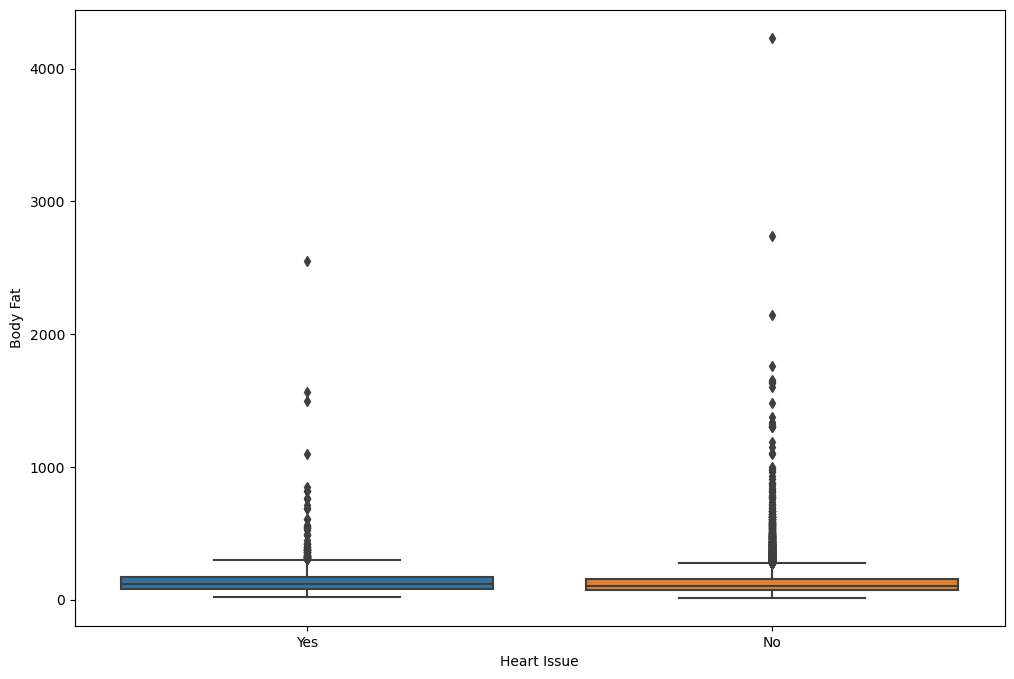

In [137]:
# Looking at seaborn box plot of heart issue Yes and No shows that similar body fat values are present in both categories
# Suprisingly the higher outlying body fat values are not linked to heart issues 
plt.subplots(figsize=(12, 8))
sns.boxplot(x='heart_issue', y='body_fat',data=cvd_raw)
plt.xticks(rotation='vertical')
plt.xticks([0,1] ,['Yes','No'],rotation = 0)
plt.ylabel('Body Fat')
plt.xlabel('Heart Issue');

Seaborn BoxPlot surprisingly shows higher outlier values for body fat when people didn't experience heart issues.
While based on this visual we don't suspect body fat to be a key feature, there is no urgent need to drop the column.

We are replacing missing values with the median and due to a large number of missing cases, adding a new indicator column to indicate whether the value was missing or not before being filled. This is in case we later find that missing values in themselves were an indicator.

In [138]:
#conditions
conditions = [
    (cvd_raw['body_fat'].isna() == True),
    (cvd_raw['body_fat'].isna() == False)
    ]
 
#values
values = [1.0,0.0]

# create a new indicator column
cvd_raw['missing_body_fat_indicator'] = np.select(conditions, values)


In [139]:
#used median to fill missing values as we don't have univariate/ normal distribution for our numerical fields
cvd_raw['body_fat'].fillna(cvd_raw.groupby('gender')['body_fat'].transform('median'), inplace = True)

In [140]:
#checking the final shape we have over 34,000 entries for review and 24 features in total
cvd_raw.shape

(34022, 24)

In [141]:
#Looking at snapshot of our clean data ahead of EDA
cvd_raw.head().T

id,31130.0,31131.0,31132.0,31134.0,31136.0
gender,2.00,2.0,1.00,1.00,2.00
age,85.00,44.0,70.00,73.00,41.00
ethnicity,3.00,4.0,3.00,3.00,4.00
income,4.00,11.0,11.00,12.00,7.00
household_size,1.00,4.0,2.00,2.00,1.00
marital_status,2.00,1.0,1.00,1.00,5.00
bp_regularity,1.00,1.0,1.00,1.00,1.00
systolic_bp,118.00,144.0,138.00,130.00,118.00
diastolic_bp,68.00,74.0,60.00,68.00,68.00
bmi,28.28,30.9,24.74,30.63,28.28


In [142]:
#Confirming we don't have any null values and ensuring data types are ready for next steps
cvd_raw.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 34022 entries, 31130.0 to 93702.0
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      34022 non-null  float64
 1   age                         34022 non-null  float64
 2   ethnicity                   34022 non-null  float64
 3   income                      34022 non-null  float64
 4   household_size              34022 non-null  float64
 5   marital_status              34022 non-null  float64
 6   bp_regularity               34022 non-null  float64
 7   systolic_bp                 34022 non-null  float64
 8   diastolic_bp                34022 non-null  float64
 9   bmi                         34022 non-null  float64
 10  waist_size                  34022 non-null  float64
 11  good_cholesterol            34022 non-null  float64
 12  body_fat                    34022 non-null  float64
 13  total_cholesterol    

# Summary:
After importing data from CDC website we had around 61,000 rows and 29 columns.
We started by correcting the name of the columns, and due to our interest area being heart issues we removed people 20 years or younger to reduce the number of entries where target area values were missing.

Once we had removed rows where all target fields were missing we started decoding some of the numerical entries to actual values. During this step, we identified entries where the value was missing but numerically coded in. We eventually combined our 5 target fields into one: "heart_issue".
We also combined two different fields to get a uniform unit (days) since people have stopped smoking.

We replaced missing categorical values by mode, and continuous by median. This was done by grouping by gender due to a high number of observations and to avoid any confounding effect due to gender. The significant difference was in income, followed by blood pressure and a chance of quitting smoking between the two groups.
We have represented missing values that are missing because they are not applicable by using the value '-99'. E.g., a person can't have an age for diabetes diagnosis if they never had diabetes.
Finally, there was one feature left with missing values, body fat with 56% of values missing. While we don't expect it to be a key feature due to its unique nature we have kept the column, replacing missing values with median values based on gender. We also added an indicator column to represent that value was initially missing in case it shows to be of some importance during (Exploratory Data Analysis) EDA.

We are now ready with clean data for the EDA stage.
Our target column (label) is 'heart_issue', we have 23 other columns, or features to help understand our label.We have 34,022 rows and 24 columns heading into the Exploratory Data Analysis stage

In [143]:
# save the clean data as a csv file
datapath = '../Clean Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_cvd_data = os.path.join(datapath, 'cvd_clean.csv')
if not os.path.exists(datapath_cvd_data):
    cvd_raw.to_csv(datapath_cvd_data, index=False)

## Next Notebook in the Project: [02_EDA](https://github.com/omi-singh17/Cardio-Disease-Prediction/blob/main/02%20Exploratory%20Data%20Analysis/02_EDA.ipynb "Visual exploration of features")
